In [56]:
import numpy as np
from numpy import pi, cos
from numpy.fft import fft, fftshift

import scipy.signal as signal
import matplotlib.pyplot as plt

plt.rcParams.update({"axes.grid": True, "font.size": 14})

### Exercício 1

- Realizar um processo de modulação AM DSB e AM DSB-SC
- Para o caso da modulação AM DSB-SC, realizar o processo de demodulação utilizando a função `fir1`
- Para o caso da modulação AM DSB, variar o `fator de modulação` (0.25; 0.5; 0.75; 1 e 1.5) e observar os efeitos no sinal modulado

In [57]:
fs = int(1e6)
ts = 1 / fs
t = np.arange(0, 1, ts)
f = np.arange(-fs / 2, fs / 2, 1)

#### AM DSB SC

In [74]:
fm = int(5e3)
Am = 5
m_t = Am * cos(2 * pi * fm * t)
M_f = fftshift(fft(m_t) / len(m_t))

fc = int(50e3)
Ac = 1
c_t = Ac * cos(2 * pi * fc * t)
C_f = fftshift(fft(c_t) / len(c_t))

s_t = m_t * c_t
S_f = fftshift(fft(s_t) / len(s_t))

r_t = s_t * c_t
R_f = fftshift(fft(r_t) / len(r_t))

h = signal.firwin(51, 2 * fm, fs=fs)
m_hat_t = 2 * signal.lfilter(h, 1, r_t)
M_hat_f = fftshift(fft(m_hat_t, len(f)))

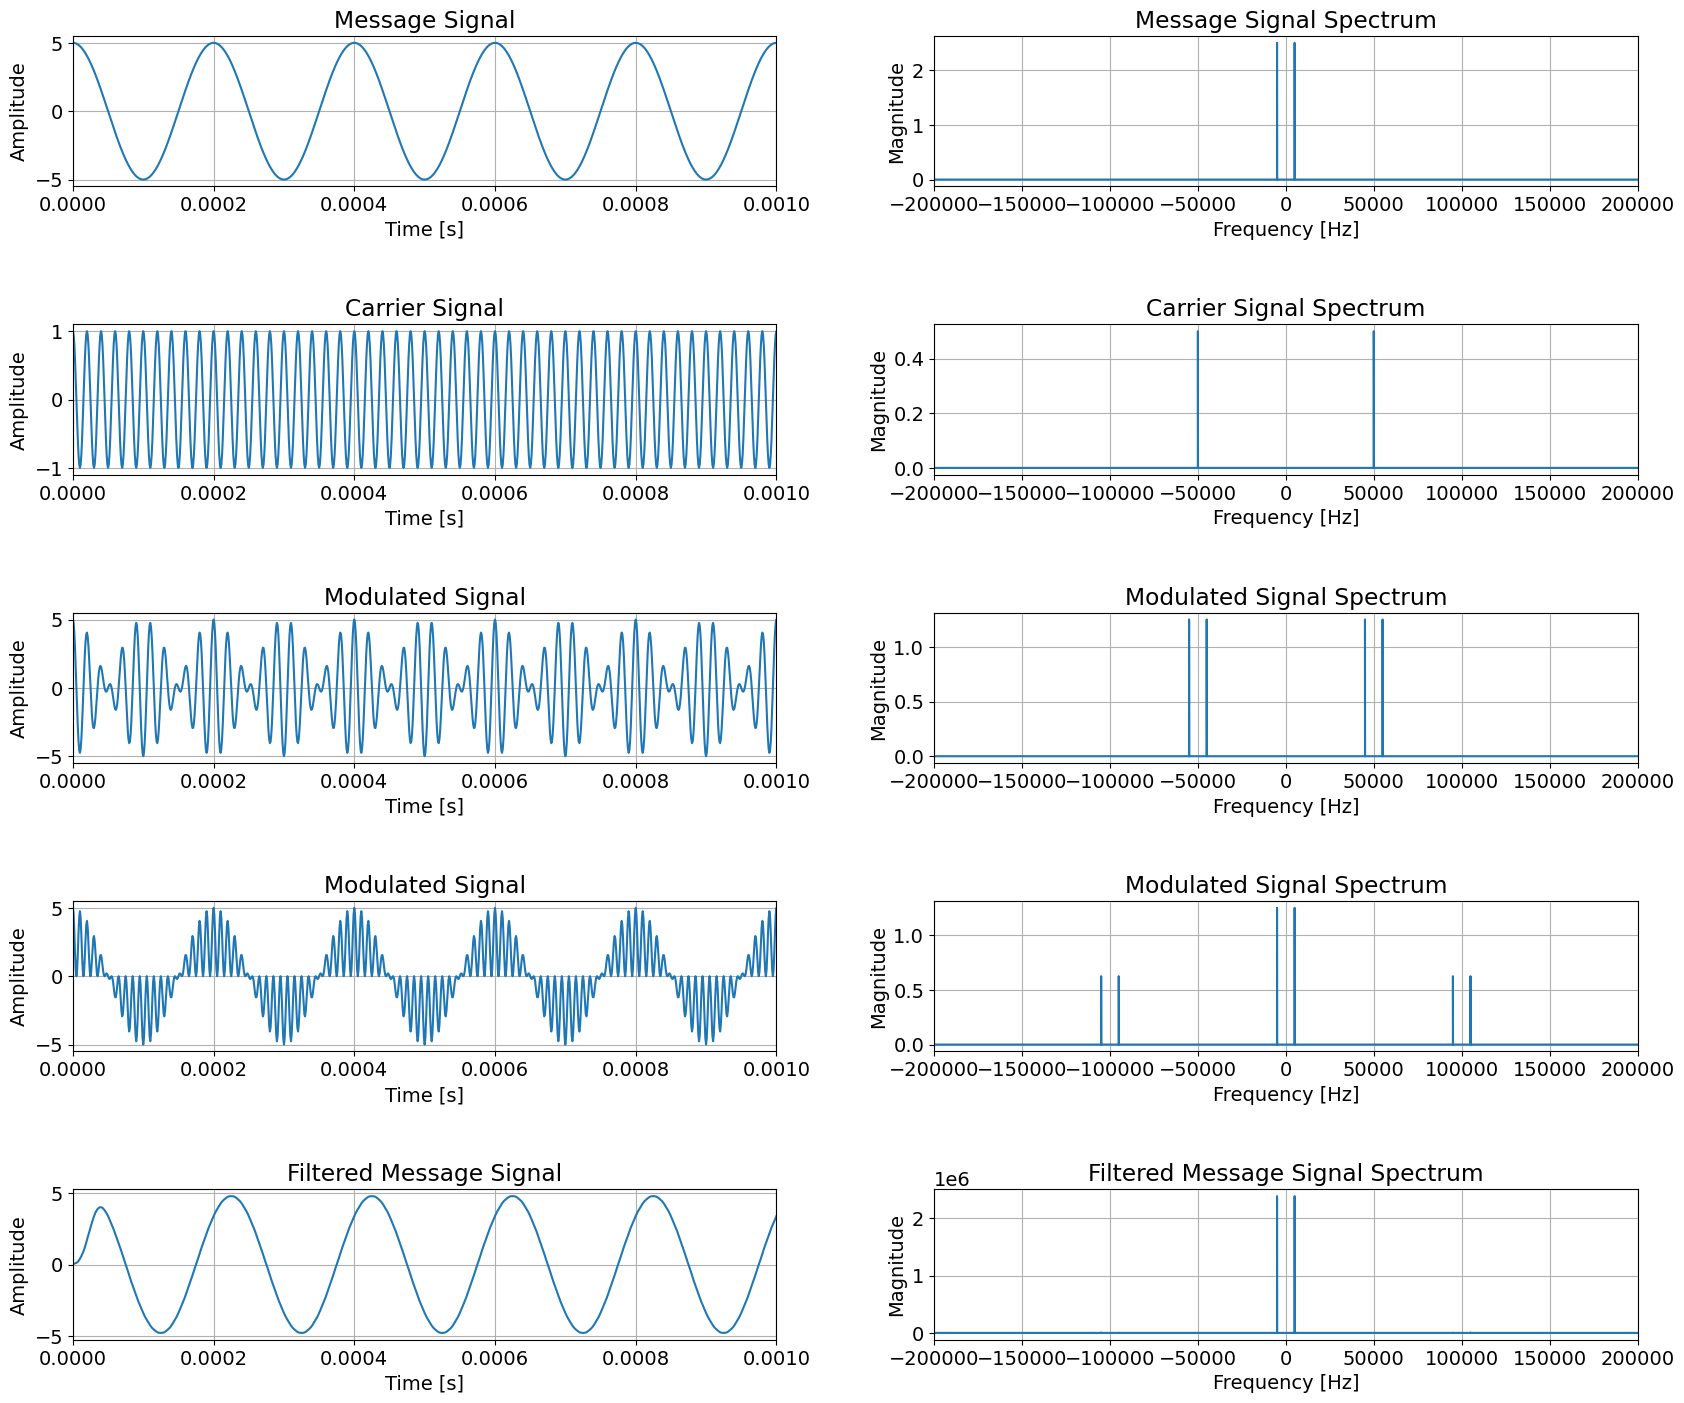

In [75]:
fig, axs = plt.subplots(5, 2, figsize=(18, 15))

axs[0, 0].plot(t, m_t)
axs[0, 0].set_title("Message Signal")
axs[0, 0].set_xlabel("Time [s]")
axs[0, 0].set_ylabel("Amplitude")
axs[0, 0].set_xlim(0, 5 * (1 / fm))

axs[0, 1].plot(f, np.abs(M_f))
axs[0, 1].set_title("Message Signal Spectrum")
axs[0, 1].set_xlabel("Frequency [Hz]")
axs[0, 1].set_ylabel("Magnitude")
axs[0, 1].set_xlim(-200e3, 200e3)

axs[1, 0].plot(t, c_t)
axs[1, 0].set_title("Carrier Signal")
axs[1, 0].set_xlabel("Time [s]")
axs[1, 0].set_ylabel("Amplitude")
axs[1, 0].set_xlim(0, 5 * (1 / fm))

axs[1, 1].plot(f, np.abs(C_f))
axs[1, 1].set_title("Carrier Signal Spectrum")
axs[1, 1].set_xlabel("Frequency [Hz]")
axs[1, 1].set_ylabel("Magnitude")
axs[1, 1].set_xlim(-200e3, 200e3)

axs[2, 0].plot(t, s_t)
axs[2, 0].set_title("Modulated Signal")
axs[2, 0].set_xlabel("Time [s]")
axs[2, 0].set_ylabel("Amplitude")
axs[2, 0].set_xlim(0, 5 * (1 / fm))

axs[2, 1].plot(f, np.abs(S_f))
axs[2, 1].set_title("Modulated Signal Spectrum")
axs[2, 1].set_xlabel("Frequency [Hz]")
axs[2, 1].set_ylabel("Magnitude")
axs[2, 1].set_xlim(-200e3, 200e3)

axs[3, 0].plot(t, r_t)
axs[3, 0].set_title("Modulated Signal")
axs[3, 0].set_xlabel("Time [s]")
axs[3, 0].set_ylabel("Amplitude")
axs[3, 0].set_xlim(0, 5 * (1 / fm))

axs[3, 1].plot(f, np.abs(R_f))
axs[3, 1].set_title("Modulated Signal Spectrum")
axs[3, 1].set_xlabel("Frequency [Hz]")
axs[3, 1].set_ylabel("Magnitude")
axs[3, 1].set_xlim(-200e3, 200e3)

axs[4, 0].plot(t, m_hat_t)
axs[4, 0].set_title("Filtered Message Signal")
axs[4, 0].set_xlabel("Time [s]")
axs[4, 0].set_ylabel("Amplitude")
axs[4, 0].set_xlim(0, 5 * (1 / fm))

axs[4, 1].plot(f, np.abs(M_hat_f))
axs[4, 1].set_title("Filtered Message Signal Spectrum")
axs[4, 1].set_xlabel("Frequency [Hz]")
axs[4, 1].set_ylabel("Magnitude")
axs[4, 1].set_xlim(-200e3, 200e3)

plt.tight_layout(pad=3)
plt.show()

#### AM DSC TC

### Exercício 2

- Gerar 3 sinais (cosenos) nas frequências de 1, 2 e 3 kHz
- Realizar a multiplexação dos sinais para as frequências 10, 12 e 14 kHz para a transmissão em um canal de comunicação
- Recuperar os sinais originais